# Load in 20 Newsgroup Data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
import copy
from copy import deepcopy
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score,adjusted_rand_score, adjusted_mutual_info_score
def all_5scores(y_test, y_predicted):
    #Print the Homogeneity Score 
    hg_score = homogeneity_score(y_test,y_predicted)
    print("Homogeneity of the model is:", hg_score)
    # Print the Completeness
    cp_score = completeness_score(y_test,y_predicted)
    print("Completeness of the model is:", cp_score)
    # Print the V-measure
    vm_score = v_measure_score(y_test,y_predicted)
    print("V-measure of the model is:", vm_score)
    # Print the adjusted Rand Index 
    ar_score = adjusted_rand_score(y_test,y_predicted)
    print("Adjusted Rand Index of the model is:", ar_score)
    # Print the adjusted mutual information score
    am_score = adjusted_mutual_info_score(y_test,y_predicted)
    print("Adjusted mutual information of the model is:", am_score)
    return [hg_score,cp_score,vm_score, ar_score, am_score]

In [ ]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
# train_dataset = fetch_20newsgroups(subset = 'train', categories = categories,shuffle = True, random_state = None,remove=('headers','footers'))
# test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None,remove=('headers','footers'))
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state= None,remove=('headers','footers'))

# Question 1

In [ ]:
#Question1 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english',min_df=3)
# x_train_tfidf = tfidf_vect.fit_transform(train_dataset.data) 
# x_test_tfidf = tfidf_vect.fit_transform(test_dataset.data) 
all_tfidf = tfidf_vect.fit_transform(dataset.data) 
print("Shape of TF-IDF matrix: ", all_tfidf.shape)

Shape of TF-IDF matrix:  (7882, 23522)


# Question 2

In [ ]:
#Question 2  (on all data)
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from copy import deepcopy
#assign targets into two classes (comp vs. rec)
y= dataset.target

y_true = deepcopy(y)
y_true[y<=3] = 0
y_true[y>=4] = 1

model_kmean = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
y_pred_kmean = model_kmean.fit_predict(all_tfidf)
contingency_matrix_1 = contingency_matrix(y_true,y_pred_kmean) ## rename the matrix, otherwise it will overwrite the model
print(contingency_matrix_1)

[[3236  667]
 [  62 3917]]


Contingency Matrix:


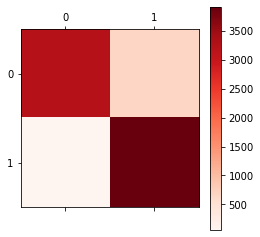

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt

print("Contingency Matrix:")

plt.matshow(contingency_matrix_1,cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

# Question 3

In [ ]:
#Question 3 
all_5scores(y_true, y_pred_kmean)

Homogeneity of the model is: 0.5955721597617112
Completeness of the model is: 0.6072450205651874
V-measure of the model is: 0.6013519499351727
Adjusted Rand Index of the model is: 0.6642178569831312
Adjusted mutual information of the model is: 0.6013150991241574


[0.5955721597617112,
 0.6072450205651874,
 0.6013519499351727,
 0.6642178569831312,
 0.6013150991241574]

# Question 4

Text(0, 0.5, 'Ratio: total explained variance')

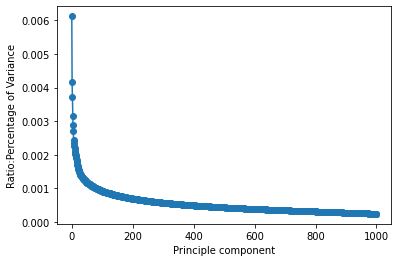

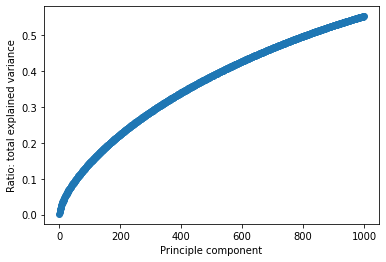

In [ ]:
#Question 4 
from sklearn.decomposition import TruncatedSVD
#?TruncatedSVD
svd = TruncatedSVD(n_components=1000,random_state=0)
all_tfidf_svd = svd.fit_transform(all_tfidf)
plt.figure()
plt.plot(np.arange(1000),sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000),sorted(svd.explained_variance_ratio_,reverse=True),)
plt.xlabel("Principle component"); plt.ylabel("Ratio:Percentage of Variance")

plt.figure()
plt.plot(np.arange(1000),np.cumsum(svd.explained_variance_ratio_))
plt.scatter(np.arange(1000),np.cumsum(svd.explained_variance_ratio_))
plt.xlabel("Principle component"); plt.ylabel("Ratio: total explained variance")

# Question 5

Current r value  = 1


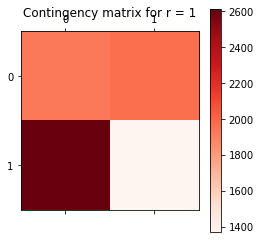

Current r value  = 2


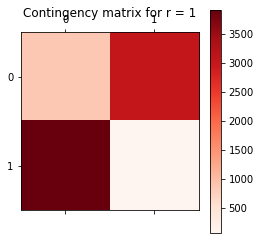

Current r value  = 3


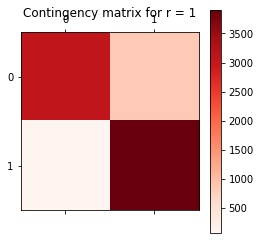

Current r value  = 5


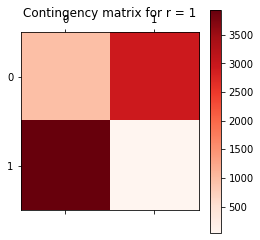

Current r value  = 10


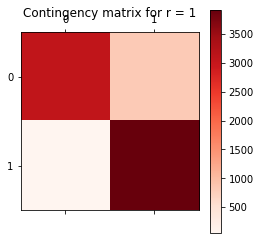

Current r value  = 20


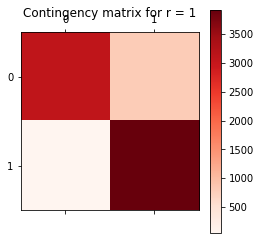

Current r value  = 50


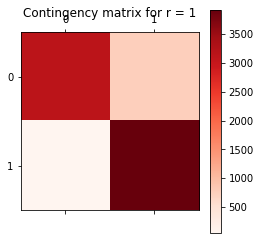

Current r value  = 100


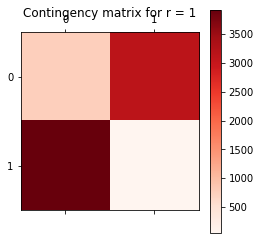

Current r value  = 300


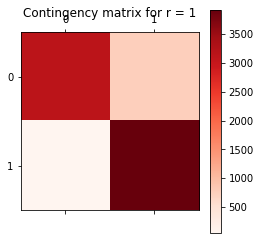

In [ ]:
r = [1,2,3,5,10,20,50,100,300]

cont_matrix = []
hg_score = []
cm_score = []
vm_score = [] 
ar_score = []
am_score = []


for i in r:
    print('Current r value  = %d' %i)
    
    ykm_svd = model_kmean.fit_predict(all_tfidf_svd[:,:i])


    mat = contingency_matrix(y_true,ykm_svd )
    cont_matrix.append(mat)
    

    plt.matshow(mat,cmap=plt.cm.Reds)
    plt.colorbar()
    plt.title('Contingency matrix for r = 1')
    plt.show()
    
    hg_score.append(homogeneity_score(y_true, ykm_svd ))
    cm_score.append(completeness_score(y_true, ykm_svd ))
    vm_score.append(v_measure_score(y_true, ykm_svd ))
    ar_score.append(adjusted_rand_score(y_true, ykm_svd ))
    am_score.append(adjusted_mutual_info_score(y_true, ykm_svd ))

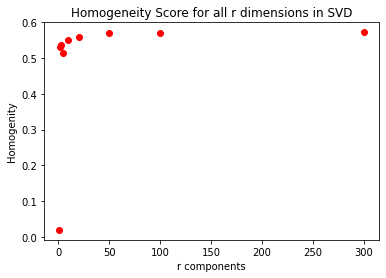

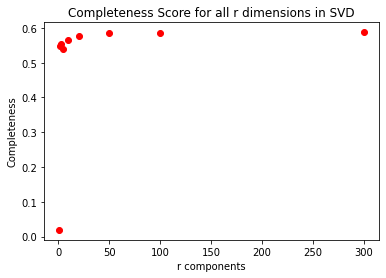

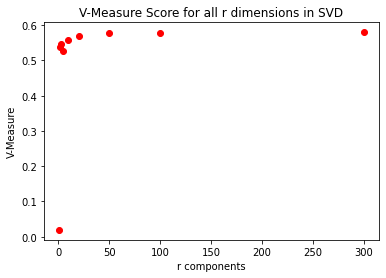

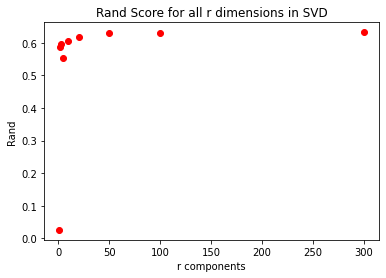

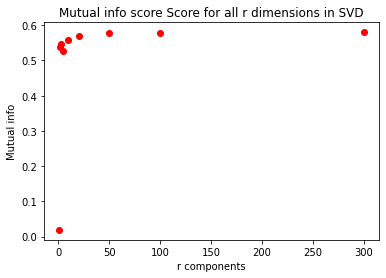

In [ ]:
sp = plt.scatter(x= r,y= hg_score,color='r',marker='o')
plt.ylabel('Homogenity')
plt.xlabel('r components')
plt.title('Homogeneity Score for all r dimensions in SVD')
plt.show()
#plot the completeness score
plt.scatter(x= r,y= cm_score,color='r',marker='o')
plt.ylabel('Completeness')
plt.xlabel('r components')
plt.title('Completeness Score for all r dimensions in SVD')
plt.show()
#plot vmeasure score
plt.scatter(x= r,y= vm_score,color='r',marker='o')
plt.ylabel('V-Measure')
plt.xlabel('r components')
plt.title('V-Measure Score for all r dimensions in SVD')
plt.show()
#plot rand score
plt.scatter(x= r,y= ar_score,color='r',marker='o')
plt.ylabel('Rand')
plt.xlabel('r components')
plt.title('Rand Score for all r dimensions in SVD')
plt.show()
#plot mutual information score
plt.scatter(x= r,y= am_score,color='r',marker='o')
plt.ylabel('Mutual info')
plt.xlabel('r components')
plt.title('Mutual info score Score for all r dimensions in SVD')
plt.show()

Current r value = 1


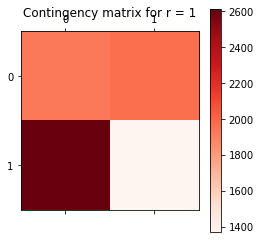

Current r value = 2


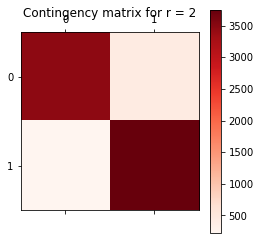

Current r value = 3


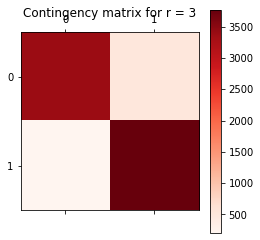

Current r value = 5


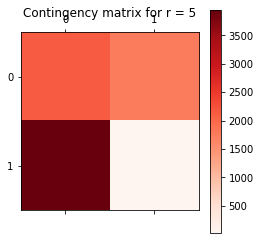

Current r value = 10


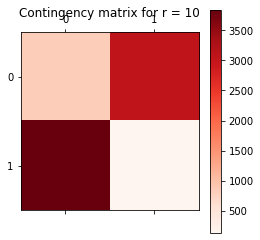

Current r value = 20


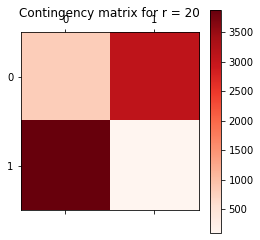

Current r value = 50


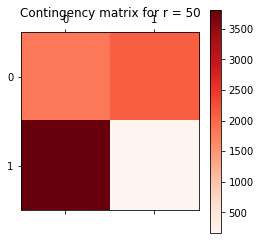

Current r value = 100


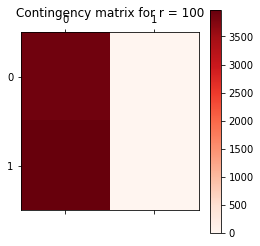

Current r value = 300


In [ ]:
from sklearn.decomposition import NMF
#Metric buckets
cont_matrix = []
hg_score = []
cm_score = []
vm_score = [] 
ar_score = []
am_score = []


for iter in r:
    print('Current r value = %d' %iter)

    nmf = NMF(n_components=iter, random_state=0)
    all_tfidf_nmf = nmf.fit_transform(all_tfidf)

    kmean2 = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state = 0,n_init = 30)
    ykm_nmf = kmean2.fit_predict(all_tfidf_nmf)
  
    mat = contingency_matrix(y_true, ykm_nmf )  
    cont_matrix.append(mat)

    plt.matshow(mat,cmap=plt.cm.Reds)
    plt.colorbar()
    plt.title('Contingency matrix for r = %d' %iter)
    plt.show()
    hg_score.append(homogeneity_score(y_true, ykm_nmf ))
    cm_score.append(completeness_score(y_true, ykm_nmf ))
    vm_score.append(v_measure_score(y_true, ykm_nmf ))
    ar_score.append(adjusted_rand_score(y_true, ykm_nmf ))
    am_score.append(adjusted_mutual_info_score(y_true, ykm_nmf ))

In [ ]:
#Plot metrics
#plot the homogenity score
sp = plt.scatter(x= r,y= hg_score,color='r',marker='o')
plt.ylabel('Homogenity')
plt.xlabel('r components')
plt.title('Homogeneity Score for all r dimensions in NMF')
plt.show()
#plot the completeness score
plt.scatter(x= r,y= cm_score,color='r',marker='o')
plt.ylabel('Completeness')
plt.xlabel('r components')
plt.title('Completeness Score for all r dimensions in NMF')
plt.show()
#plot vmeasure score
plt.scatter(x= r,y= vm_score,color='r',marker='o')
plt.ylabel('V-Measure')
plt.xlabel('r components')
plt.title('V-Measure Score for all r dimensions in NMF')
plt.show()
#plot rand score
plt.scatter(x= r,y= ar_score,color='r',marker='o')
plt.ylabel('Rand')
plt.xlabel('r components')
plt.title('Rand Score for all r dimensions in NMF')
plt.show()
#plot mutual information score
plt.scatter(x= r,y= am_score,color='r',marker='o')
plt.ylabel('Mutual info')
plt.xlabel('r components')
plt.title('Mutual info score Score for all r dimensions in NMF')
plt.show()

# Question 6: 



# Question 7


In [ ]:
vis_best_r = model_kmean.fit_predict(all_tfidf_svd[:,:300])

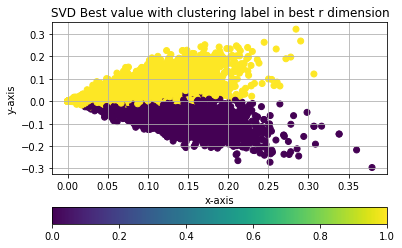

In [ ]:

plt.scatter(all_tfidf_svd[:,0],all_tfidf_svd[:,1],c = vis_best_r)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('SVD Best value with clustering label in best r dimension')
plt.grid(True)
plt.colorbar(orientation="horizontal")
plt.show()

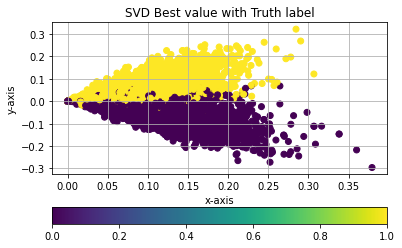

In [124]:

plt.scatter(all_tfidf_svd[:,0],all_tfidf_svd[:,1],c = y_true)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('SVD Best value with Truth label')
plt.grid(True)
plt.colorbar(orientation="horizontal")
plt.show()

In [125]:
best_r_nmf = kmean2.fit_predict(all_tfidf_nmf[:,:2])

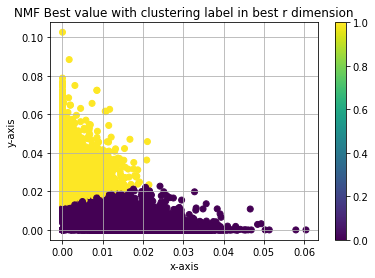

In [126]:

plt.scatter(all_tfidf_nmf[:,0],all_tfidf_nmf[:,1],c = best_r_nmf)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('NMF Best value with clustering label in best r dimension')
plt.grid(True)
plt.colorbar()
plt.show()

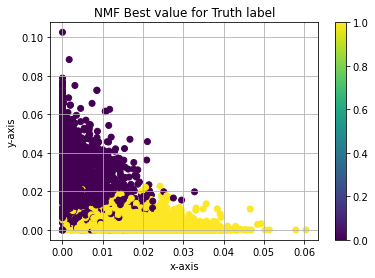

In [127]:
# The below code plots
plt.scatter(all_tfidf_nmf[:,0],all_tfidf_nmf[:,1],c = y_true)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('NMF Best value for Truth label')
plt.grid(True)
plt.colorbar()
plt.show()

# Question 8

# Question 9

In [ ]:
# Data Cleaning
def clean_data(data):
    new_data = [None]*len(data)
    for i in range(len(data)):
        list_word = data[i].split()
        new_words =[]
        for word in list_word:
            list_char = list(word)
            new_char = [i for i in list_char if not i.isdigit() and i not in punctuation]
            new_word = "".join(new_char)
            new_words.append(new_word)
        new_sent = [i for i in new_words if not i.isdigit() and i not in combined_stopwords]
        new_data[i] = " ".join(new_sent)
    return new_data


In [ ]:
# Load 20 newsgroup data with all 20 catogories
dataset_20 = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = None, remove=('headers','footers'))
y_20 = copy.deepcopy(dataset_20.target)
x_20_clean = clean_data(dataset_20.data)

In [ ]:
# TFIDF
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf_20 = tfidf_vect.fit_transform(x_20_clean)

In [ ]:
# find best r for SVD
r_range = range(13, 20)
LSI_score = np.empty([len(r_range),5])
i = 0
for r in r_range:
    LSI = TruncatedSVD(n_components=r, random_state=0) 
    x_train_LSI_20 = LSI.fit_transform(x_train_tfidf_20)
    model_20 = KMeans(n_clusters=20, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
    y_pred_20 = model_20.fit_predict(x_train_LSI_20)
    print("For r=" , r)
    LSI_score[i, :] = all_5scores(y_20, y_pred_20)
    i=i+1

In [ ]:
plt.scatter(r_range, LSI_score[:,0], label = "Homogeneity")
plt.scatter(r_range, LSI_score[:,1], label = "completeness")
plt.scatter(r_range, LSI_score[:,2], label = "V-measure")
plt.scatter(r_range, LSI_score[:,3], label = "adjusted Rand Index")
plt.scatter(r_range, LSI_score[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("r")
plt.title("r vs all 5 scores for SVD")
plt.legend()
plt.show()

In [ ]:
# TDIDF + LSI + Kmeans
LSI = TruncatedSVD(n_components=13, random_state=0) 
x_train_LSI_20 = LSI.fit_transform(x_train_tfidf_20)
model_20 = KMeans(n_clusters=20, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
y_pred_20 = model_20.fit_predict(x_train_LSI_20)
all_5scores(y_20, y_pred_20)

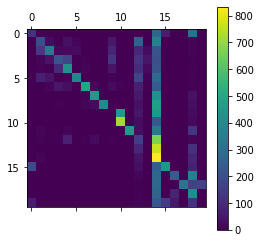

In [ ]:
cm_20 = confusion_matrix(y_20, y_pred_20)
rows, cols = linear_sum_assignment(cm_20, maximize=True)
plt.matshow(cm_20[rows[:, np.newaxis], cols]);
plt.colorbar()
plt.title("Contingency Matrix on 20 News data with SVD R=13")
plt.show()


In [ ]:
# Find best r for NMF
r_range = range(2, 30, 2)
nmf_scores = np.empty([len(r_range),5])
i = 0
for r in r_range:
    nmf_20 = NMF(n_components=r, random_state=0, init='random') 
    x_train_NMF_20 = nmf_20.fit_transform(x_train_tfidf_20)
    model_20 = KMeans(n_clusters=20, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
    y_pred_20 = model_20.fit_predict(x_train_NMF_20)
    print("For r=" , r)
    nmf_scores[i, :]= all_5scores(y_20, y_pred_20)
    i=i+1

In [ ]:
plt.scatter(r_range, nmf_scores[:,0], label = "Homogeneity")
plt.scatter(r_range, nmf_scores[:,1], label = "completeness")
plt.scatter(r_range, nmf_scores[:,2], label = "V-measure")
plt.scatter(r_range, nmf_scores[:,3], label = "adjusted Rand Index")
plt.scatter(r_range, nmf_scores[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("r")
plt.title("r vs all 5 scores for NMF")
plt.legend()
plt.show()

In [ ]:
nmf_20 = NMF(n_components=16, random_state=0, init='random') 
x_train_NMF_20 = nmf_20.fit_transform(x_train_tfidf_20)
model_20 = KMeans(n_clusters=20, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
y_pred_20 = model_20.fit_predict(x_train_NMF_20)
all_5scores(y_20, y_pred_20)

In [ ]:
cm_20 = contingency_matrix(y_20, y_pred_20)
rows, cols = linear_sum_assignment(cm_20, maximize=True)
plt.matshow(cm_20[rows[:, np.newaxis], cols]);
plt.colorbar()
plt.title("Contingency Matrix on 20 News data with NMF")
plt.show()

# Question 10

In [ ]:
t = time.time()
NMF_20 = NMF(n_components=16, solver='mu', init='random', beta_loss = 'kullback-leibler', random_state=0)
x_train_20_NMF = NMF_20.fit_transform(x_train_tfidf_20) # Performing NMF on TFIDF train matrix
print((time.time()-t)/60, "minutes")

105.31512641906738


In [ ]:
model_20 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40)
y_pred_20 = model_20.fit_predict(x_train_20_NMF)
all_5scores(y_20, y_pred_20)

Homogeneity of the model is: 0.4181189579608244
Completeness of the model is: 0.44009138697794375
V-measure of the model is: 0.42882389664944115
Adjusted Rand Index of the model is: 0.23023348738199984
Adjusted mutual information of the model is: 0.4269308799855078


[0.4181189579608244,
 0.44009138697794375,
 0.42882389664944115,
 0.23023348738199984,
 0.4269308799855078]

In [ ]:
cm_20 = contingency_matrix(y_20, y_pred_20)
rows, cols = linear_sum_assignment(cm_20, maximize=True)
plt.matshow(cm_20[rows[:, np.newaxis], cols]);
plt.colorbar()
plt.title("Contingency Matrix on 20 News data with NMF KL")
plt.show()

# Quesiont 11

In [ ]:
# install UMAP
try:
  import umap
except:
  !pip install umap-learn[plot]
  !pip install holoviews
  !pip install -U ipykernel
  import umap

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 1.2MB 9.6MB/s 
     |████████████████████████████████| 15.8MB 221kB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 706kB 25.4MB/s 
     |████████████████████████████████| 112kB 37.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=7a8a867d8ae46ffb5c2eec76a19fd9abb57353098e71bf56b2074029e9465ad7
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=d4013b88d804ce04a0729b39c27713ea50b6f20a07742e5120f356f1101dbebf
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=e9e107725c8b739c287acb22d2f7f26a8b6869b5d8d

In [ ]:
# Find best r for UMAP euclidean
r_range = [2,3,5,10,20,50,75,100,150,200]
scores = np.empty([len(r_range),5])
i = 0
for r in r_range:
    embedding_umap_eu = umap.UMAP(n_components=r, metric='euclidean').fit_transform(x_train_tfidf_20)
    embedding_umap_eu = StandardScaler().fit_transform(embedding_umap_eu)
    model_20 = KMeans(n_clusters=20,init='k-means++', max_iter=1000, n_init=40)
    y_pred_20_umap_eu = model_20.fit_predict(embedding_umap_eu)
    print("For r=" , r)
    scores[i,:]= all_5scores(y_20, y_pred_20_umap_eu)
    i=i+1

In [ ]:
%%time
embedding_umap_eu = umap.UMAP(n_components=10, metric='euclidean').fit_transform(x_train_tfidf_20)
embedding_umap_eu = StandardScaler().fit_transform(embedding_umap_eu)
model_20 = KMeans(n_clusters=20,init='k-means++', max_iter=1000, n_init=40)
y_pred_20_umap_eu = model_20.fit_predict(embedding_umap_eu)
all_5scores(y_20, y_pred_20_umap_eu)

Homogeneity of the model is: 0.007366777551716433
Completeness of the model is: 0.00750877536690737
V-measure of the model is: 0.007437098723847905
Adjusted Rand Index of the model is: 0.0009977098458853904
Adjusted mutual information of the model is: 0.004200059917436384


[0.007366777551716433,
 0.00750877536690737,
 0.007437098723847905,
 0.0009977098458853904,
 0.004200059917436384]

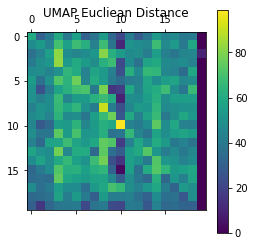

In [ ]:
cm_20_umap_eu = contingency_matrix(y_20, y_pred_20_umap_eu)
rows, cols = linear_sum_assignment(cm_20_umap_eu, maximize=True)
plt.matshow(cm_20_umap_eu[rows[:, np.newaxis], cols]);
plt.title("Contingency Matrix of KMeans Clustering using UMAP Eucliean Distance")
plt.colorbar()
plt.show()

In [ ]:
# find best r for UMAP cosince
# However we found the r did not matter that much
%%time
for r in range(2, 40, 5):
    embedding_umap_cs = umap.UMAP(n_components=r, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_20))
    embedding_umap_cs = np.nan_to_num(embedding_umap_cs, nan=0)
    model_20 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40)
    # y_pred_20_umap_cs = model_20.fit_predict(StandardScaler().fit_transform(embedding_umap_cs))
    y_pred_20_umap_cs = model_20.fit_predict(embedding_umap_cs)
    print("For r=", r)
    all_5scores(y_20, y_pred_20_umap_cs)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:126: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 539 edges.
It has only fully disconnected 24 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  f"A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.\n"


CPU times: user 1min 50s, sys: 853 ms, total: 1min 51s
Wall time: 58.6 s


In [ ]:
embedding_umap_cs = umap.UMAP(n_components=40, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_20))
##################################################################
#### During testing, there are nan reported in the embedding,#####
#### Replace nan with a low number 0 #############################
##################################################################
embedding_umap_cs = np.nan_to_num(embedding_umap_cs, nan=0)
embedding_umap_cs.shape
model_20 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=40)
y_pred_20_umap_cs = model_20.fit_predict(embedding_umap_cs)
all_5scores(y_20, y_pred_20_umap_cs)

(18846, 40)

In [ ]:
cm_20_umap_cs = contingency_matrix(y_20, y_pred_20_umap_cs)
rows, cols = linear_sum_assignment(cm_20_umap_cs, maximize=True)
plt.matshow(cm_20_umap_cs[rows[:, np.newaxis], cols]);
plt.title("Contingency Matrix with KMeans on UMAP Cosince Distance")
plt.colorbar()
plt.show()

Homogeneity of the model is: 0.5901367916484735
Completeness of the model is: 0.6335118950788062
V-measure of the model is: 0.6110555771246045
Adjusted Rand Index of the model is: 0.4694374493725936
Adjusted mutual information of the model is: 0.6097396142802787


[0.5901367916484735,
 0.6335118950788062,
 0.6110555771246045,
 0.4694374493725936,
 0.6097396142802787]

In [ ]:
############# Do not run until plot_mat.py is imported ############################
# plot_mat.plot_sim_mat(cm_20_umap_cs[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, pic_fname="new20.png", size=(15,15))


# Question 12





# Question 13

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
model_AC_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(embedding_umap_cs)
all_5scores(y_20, model_AC_ward.labels_)

NameError: ignored

In [ ]:
model_AC_single = AgglomerativeClustering(n_clusters=20, linkage='single').fit(embedding_umap_cs)
all_5scores(y_20, model_AC_single.labels_)

Homogeneity of the model is: 0.00589641958923817
Completeness of the model is: 0.23969010232167953
V-measure of the model is: 0.011509698526442
Adjusted Rand Index of the model is: -5.140992250030946e-06
Adjusted mutual information of the model is: 0.006696790490441738


[0.00589641958923817,
 0.23969010232167953,
 0.011509698526442,
 -5.140992250030946e-06,
 0.006696790490441738]

In [ ]:
model_AC_complete = AgglomerativeClustering(n_clusters=20, linkage='complete').fit(embedding_umap_cs)
all_5scores(y_20, model_AC_complete.labels_)

In [ ]:
model_AC_average = AgglomerativeClustering(n_clusters=20, linkage='average').fit(embedding_umap_cs)
all_5scores(y_20, model_AC_average.labels_)

# Question 14 DBSCAN and HDBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
try:
    import hdbscan
except:
    !pip install hdbscan
    import hdbscan

     |████████████████████████████████| 6.4MB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311709 sha256=514b15dd670c93d700371b15f380b4f0f40d2e416f26eaddd12152524b013f16
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [ ]:
# find best eps for DBSCAN
eps_range = [0.4, 0.45, 0.5, 0.525, 0.55, 0.6, 0.7]
scores = np.empty([len(eps_range),5])
i = 0
for eps in eps_range:
    model_dbscan = DBSCAN(eps= eps, min_samples=150, n_jobs = 4).fit(embedding_umap_cs)
    y_20_pred_dbscan = model_dbscan.labels_
    print("For eps=" , eps)
    scores[i,:]= all_5scores(y_20, y_20_pred_dbscan)
    i=i+1

In [ ]:
# Find best min_samples for DBSCAN
ms_range = [100, 125, 150, 175, 200]
scores = np.empty([len(ms_range),5])
i = 0
for ms in ms_range:
    model_dbscan = DBSCAN(eps= 0.55, min_samples=ms, n_jobs = 4).fit(embedding_umap_cs)
    y_20_pred_dbscan = model_dbscan.labels_
    print("For min_samples=" , ms)
    scores[i,:]= all_5scores(y_20, y_20_pred_dbscan)
    i=i+1

In [ ]:
model_dbscan = DBSCAN(eps= 0.55, min_samples=150, n_jobs = 4).fit(embedding_umap_cs)
y_20_pred_dbscan = model_dbscan.labels_
all_5scores(y_20, y_20_pred_dbscan)

Homogeneity of the model is: 0.4690570483110667
Completeness of the model is: 0.6325684125398013
V-measure of the model is: 0.5386779499659793
Adjusted Rand Index of the model is: 0.2327208262555815
Adjusted mutual information of the model is: 0.5375052020918734


[0.4690570483110667,
 0.6325684125398013,
 0.5386779499659793,
 0.2327208262555815,
 0.5375052020918734]

In [ ]:
### Find best min_samples for HDBSCAN ####
ms_range = [2, 5, 7, 10, 20, 30,50, 100, 120]
scores = np.empty([len(ms_range),5])
i = 0
for ms in ms_range:
    model_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 100, min_samples = ms).fit(embedding_umap_cs)
    y_20_pred_hdbscan = model_hdbscan.labels_
    print("For min_samples=" , ms)
    scores[i,:] = all_5scores(y_20, y_20_pred_hdbscan)
    i=i+1

In [ ]:
plt.scatter(ms_range, scores[:,0], label = "Homogeneity")
plt.scatter(ms_range, scores[:,1], label = "completeness")
plt.scatter(ms_range, scores[:,2], label = "V-measure")
plt.scatter(ms_range, scores[:,3], label = "adjusted Rand Index")
plt.scatter(ms_range, scores[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("min_samples")
plt.title("min_samples vs all 5 scores for HDBSCAN")
plt.legend()
plt.show()

In [ ]:
model_hdbscan = hdbscan.HDBSCAN(min_cluster_size = 100, min_samples = 50).fit(embedding_umap_cs)
y_20_pred_hdbscan = model_hdbscan.labels_
all_5scores(y_20, y_20_pred_hdbscan)

Homogeneity of the model is: 0.3808975361850975
Completeness of the model is: 0.5903556397397465
V-measure of the model is: 0.4630409747401364
Adjusted Rand Index of the model is: 0.129153782859374
Adjusted mutual information of the model is: 0.46181903863965734


[0.3808975361850975,
 0.5903556397397465,
 0.4630409747401364,
 0.129153782859374,
 0.46181903863965734]

# Question 15

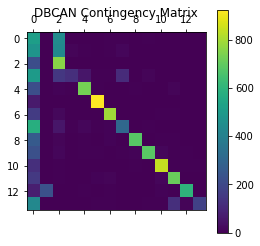

In [ ]:
cm_20_dbscan = contingency_matrix(y_20, y_20_pred_dbscan)
rows, cols = linear_sum_assignment(cm_20_dbscan, maximize=True)
plt.matshow(cm_20_dbscan[rows[:, np.newaxis], cols]);
plt.title("DBSCAN Contingency Matrix")
plt.colorbar()
plt.show()

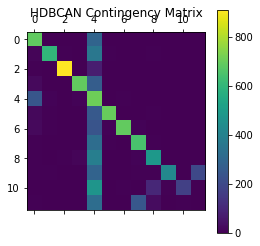

In [ ]:
cm_20_hdbscan = contingency_matrix(y_20, y_20_pred_hdbscan)
rows, cols = linear_sum_assignment(cm_20_hdbscan, maximize=True)
plt.matshow(cm_20_hdbscan[rows[:, np.newaxis], cols]);
plt.title("HDBSCAN Contingency Matrix")
plt.colorbar()
plt.show()

In [ ]:
embedding_20_umap_cs = umap.UMAP(n_components=2, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_20))
embedding_20_umap_cs = np.nan_to_num(embedding_20_umap_cs, nan=0)
color = y_20_pred_dbscan[y_20_pred_dbscan >= 0] = 1
plt.scatter(embedding_20_umap_cs[:,0], embedding_20_umap_cs[:,1], c=y_20_pred_dbscan)
plt.title("2-D DBSCAN Predicted clustering with UMAP on 20News")

# Question 16 BBC News

In [ ]:
# Download Data from https://www.kaggle.com/c/learn-ai-bbc
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Project 2 "

 BBC_News_Test.csv   'ECE219 Project 2_505650843_005453741_005649833.gdoc'
 BBC_News_Train.csv  'ECE219 S21 Project 2.ipynb'


In [ ]:
bbc_data = pd.read_csv('/content/drive/My Drive/Project 2 /BBC_News_Train.csv')

In [ ]:
bbc_data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [ ]:
x_train_bbc = bbc_data['Text']
y_train_bbc = bbc_data['Category']

In [ ]:
#### clean data and vectorize ####
x_train_bbc_clean = clean_data(x_train_bbc)
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf_bbc = tfidf_vect.fit_transform(x_train_bbc_clean)


For r= 2
Homogeneity of the model is: 0.3128051675320191
Completeness of the model is: 0.36227609434786073
V-measure of the model is: 0.33572798056863257
Adjusted Rand Index of the model is: 0.22807932509927034
Adjusted mutual information of the model is: 0.3333071136508982
For r= 3
Homogeneity of the model is: 0.4403085954437398
Completeness of the model is: 0.4934843873667547
V-measure of the model is: 0.46538241660564383
Adjusted Rand Index of the model is: 0.34753476510033837
Adjusted mutual information of the model is: 0.4634666451996803
For r= 5
Homogeneity of the model is: 0.648733705458539
Completeness of the model is: 0.6977091412545041
V-measure of the model is: 0.6723307084935549
Adjusted Rand Index of the model is: 0.5779667063956739
Adjusted mutual information of the model is: 0.6711826242565908
For r= 10
Homogeneity of the model is: 0.6224098481400389
Completeness of the model is: 0.7009482515720605
V-measure of the model is: 0.6593485087821738
Adjusted Rand Index of the 

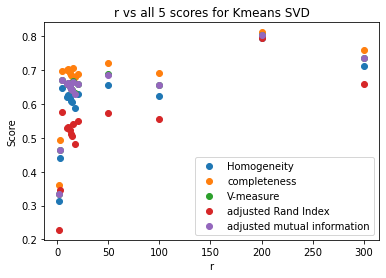

In [ ]:
#### finding best r for SVD using Kmeans
r_range = [2, 3, 5, 10,11, 12, 13, 14,15, 17, 20,50,100,200,300]
LSI_score = np.empty([len(r_range),5])
i = 0
for r in r_range:
    LSI = TruncatedSVD(n_components=r, random_state=0) 
    x_train_LSI_bbc = LSI.fit_transform(x_train_tfidf_bbc)
    model_bbc = KMeans(n_clusters=5, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
    y_pred_bbc = model_bbc.fit_predict(x_train_LSI_bbc)
    print("For r=" , r)
    LSI_score[i, :] = all_5scores(y_train_bbc, y_pred_bbc)
    i=i+1
    
plt.scatter(r_range, LSI_score[:,0], label = "Homogeneity")
plt.scatter(r_range, LSI_score[:,1], label = "completeness")
plt.scatter(r_range, LSI_score[:,2], label = "V-measure")
plt.scatter(r_range, LSI_score[:,3], label = "adjusted Rand Index")
plt.scatter(r_range, LSI_score[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("r")
plt.title("r vs all 5 scores for Kmeans SVD")
plt.legend()
plt.show()

Looks like best r for svd is 200

For r= 2
Homogeneity of the model is: 0.39445062026818994
Completeness of the model is: 0.4074859337810469
V-measure of the model is: 0.4008623338564709
Adjusted Rand Index of the model is: 0.28222237642221976
Adjusted mutual information of the model is: 0.39880552071598024
For r= 3
Homogeneity of the model is: 0.510003343284342
Completeness of the model is: 0.523381762160236
V-measure of the model is: 0.5166059528232408
Adjusted Rand Index of the model is: 0.4176011134033674
Adjusted mutual information of the model is: 0.5149521149768597
For r= 5
Homogeneity of the model is: 0.6526207026259236
Completeness of the model is: 0.6547269790562417
V-measure of the model is: 0.6536721441231922
Adjusted Rand Index of the model is: 0.6365995771551305
Adjusted mutual information of the model is: 0.6525009651271318
For r= 10
Homogeneity of the model is: 0.6410558453713618
Completeness of the model is: 0.7141081199756703
V-measure of the model is: 0.6756129829947588
Adjusted Rand Index of the mod

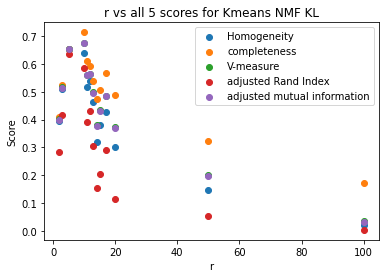

In [ ]:
#### finding best r for NMF using Kmeans
r_range = [2, 3, 5, 10,11, 12, 13, 14,15, 17, 20,50,100]
NMF_score = np.empty([len(r_range),5])
i = 0
for r in r_range:
    NMF_bbc = NMF(n_components=r, solver='mu', init='random', beta_loss = 'kullback-leibler', random_state=0)
    x_train_bbc_NMFKL = NMF_bbc.fit_transform(x_train_tfidf_bbc) # Performing NMF on TFIDF train matrix
    model_bbc = KMeans(n_clusters=5, init='k-means++', algorithm='elkan', random_state=0, max_iter=1000, n_init=40)
    y_pred_bbc = model_bbc.fit_predict(x_train_bbc_NMFKL)
    print("For r=" , r)
    NMF_score[i, :] = all_5scores(y_train_bbc, y_pred_bbc)
    i=i+1
    
plt.scatter(r_range, NMF_score[:,0], label = "Homogeneity")
plt.scatter(r_range, NMF_score[:,1], label = "completeness")
plt.scatter(r_range, NMF_score[:,2], label = "V-measure")
plt.scatter(r_range, NMF_score[:,3], label = "adjusted Rand Index")
plt.scatter(r_range, NMF_score[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("r")
plt.title("r vs all 5 scores for Kmeans NMF KL")
plt.legend()
plt.show() 

From graph, it looks like best r=10 for NMF KL



For r= 2
Homogeneity of the model is: 0.7123524070007999
Completeness of the model is: 0.7092848332292426
V-measure of the model is: 0.7108153105475108
Adjusted Rand Index of the model is: 0.714626752137123
Adjusted mutual information of the model is: 0.7098411732651928
For r= 3
Homogeneity of the model is: 0.77062139217994
Completeness of the model is: 0.7715338475896935
V-measure of the model is: 0.7710773499460799
Adjusted Rand Index of the model is: 0.8065974138307813
Adjusted mutual information of the model is: 0.7703040175822753
For r= 5
Homogeneity of the model is: 0.7818515972615472
Completeness of the model is: 0.7841544440137446
V-measure of the model is: 0.7830013274439338
Adjusted Rand Index of the model is: 0.8144510248540906
Adjusted mutual information of the model is: 0.7822676098234854
For r= 10
Homogeneity of the model is: 0.7901371394582861
Completeness of the model is: 0.7912558304565493
V-measure of the model is: 0.7906960892715973
Adjusted Rand Index of the model i

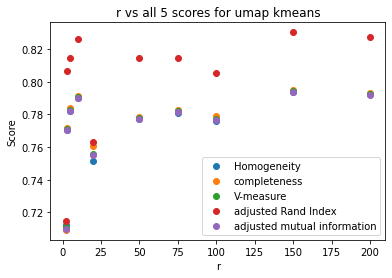

In [ ]:
#### finding best r for UMAP using Kmeans
r_range = [2,3,5,10,20,50,75,100,150,200]
umap_scores = np.empty([len(r_range),5])
i = 0
for r in r_range:
    embedding_bbc_umap_cs = umap.UMAP(n_components=r, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_bbc))
    embedding_bbc_umap_cs = StandardScaler().fit_transform(embedding_bbc_umap_cs)
    model_bbc = KMeans(n_clusters=5,init='k-means++', max_iter=1000, n_init=40)
    y_pred_bbc_umap_cs = model_bbc.fit_predict(embedding_bbc_umap_cs)
    print("For r=" , r)
    umap_scores[i,:]= all_5scores(y_train_bbc, y_pred_bbc_umap_cs)
    i=i+1

plt.scatter(r_range, umap_scores[:,0], label = "Homogeneity")
plt.scatter(r_range, umap_scores[:,1], label = "completeness")
plt.scatter(r_range, umap_scores[:,2], label = "V-measure")
plt.scatter(r_range, umap_scores[:,3], label = "adjusted Rand Index")
plt.scatter(r_range, umap_scores[:,4], label = "adjusted mutual information")
plt.ylabel("Score")
plt.xlabel("r")
plt.title("r vs all 5 scores for umap kmeans")
plt.legend()
plt.show()

In [ ]:
From graph, it looks like best r=150 for UMAP

In [ ]:
# #### dimenstion reduction by SVD ####
# x_train_LSI_bbc = TruncatedSVD(n_components=13, random_state=0).fit_transform(x_train_tfidf_bbc)
# #### dimenstion reduction by NMF KL ####
# NMF_bbc = NMF(n_components=10, solver='mu', init='random', beta_loss = 'kullback-leibler', random_state=0)
# x_train_bbc_NMFKL = NMF_bbc.fit_transform(x_train_tfidf_bbc) # Performing NMF on TFIDF train matrix
# #### Dimension Reduction by UMAP cosine ####
# embedding_bbc_umap_cs = umap.UMAP(n_components=3, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_bbc))

In [ ]:
#### dimenstion reduction by SVD ####
x_train_LSI_bbc = TruncatedSVD(n_components=200, random_state=0).fit_transform(x_train_tfidf_bbc)
#### dimenstion reduction by NMF KL ####
NMF_bbc = NMF(n_components=10, solver='mu', init='random', beta_loss = 'kullback-leibler', random_state=0)
x_train_bbc_NMFKL = NMF_bbc.fit_transform(x_train_tfidf_bbc) # Performing NMF on TFIDF train matrix
#### Dimension Reduction by UMAP cosine ####
embedding_bbc_umap_cs = umap.UMAP(n_components=150, metric='cosine').fit_transform(StandardScaler(with_mean=False).fit_transform(x_train_tfidf_bbc))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_y_train_bbc = le.fit_transform(y_train_bbc)

Text(0.5, 1.0, '2-D Ground Truth with UMAP on BBC News Data')

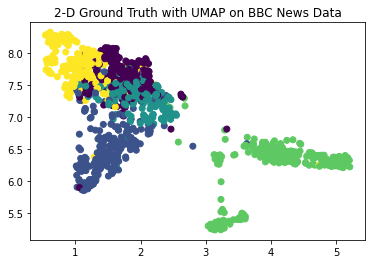

In [ ]:
plt.scatter(embedding_bbc_umap_cs[:,0], embedding_bbc_umap_cs[:,1], c=encoded_y_train_bbc)
plt.title("2-D Ground Truth with UMAP on BBC News Data")

In [ ]:
#### explore the best embedding with models ####
embeddings = {
    "svd":x_train_LSI_bbc, 
    "nmf":x_train_bbc_NMFKL, 
    "UMAP":embedding_bbc_umap_cs
}
i=0
scores = np.empty([12,5])
for name, em in embeddings.items():
    print("Running embedding for ", name)
    print("Kmeans:")
    model_KM_bbc = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40).fit(em)
    y_pred_KM_bbc = model_KM_bbc.labels_
    scores[i,:] = all_5scores(y_train_bbc, y_pred_KM_bbc)
    i=i+1
    print("DBSCAN:")
    model_dbscan_bbc = DBSCAN(eps= 0.6, min_samples=49, n_jobs = 4).fit(em)
    y_pred_dbscan_bbc = model_dbscan_bbc.labels_
    scores[i,:] =all_5scores(y_train_bbc, y_pred_dbscan_bbc)
    i=i+1
    print("HDBSCAN:")
    model_hdbscan_bbc = hdbscan.HDBSCAN(min_cluster_size = 100, min_samples = 2).fit(em)
    y_pred_hdbscan_bbc = model_hdbscan_bbc.labels_
    scores[i,:] =all_5scores(y_train_bbc, y_pred_hdbscan_bbc)
    i=i+1
    print("Agglomerative:")
    model_AC_ward = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(em)
    y_pred_AC_bbc = model_KM_bbc.labels_
    scores[i,:] =all_5scores(y_train_bbc, model_AC_ward.labels_)
    i=i+1

Running embedding for  svd
Kmeans:
Homogeneity of the model is: 0.7968582282453556
Completeness of the model is: 0.8125393474714432
V-measure of the model is: 0.8046223935901674
Adjusted Rand Index of the model is: 0.7962052071992054
Adjusted mutual information of the model is: 0.8039561391486759
DBSCAN:
Homogeneity of the model is: 0.01555108068888863
Completeness of the model is: 0.03601845743659415
V-measure of the model is: 0.021723131842788155
Adjusted Rand Index of the model is: 0.01627337317760765
Adjusted mutual information of the model is: 0.02057472509944125
HDBSCAN:
Homogeneity of the model is: 4.1570730231363126e-16
Completeness of the model is: 1.0
V-measure of the model is: 8.314146046272621e-16
Adjusted Rand Index of the model is: 0.0
Adjusted mutual information of the model is: 1.23912395884306e-15
Agglomerative:
Homogeneity of the model is: 0.6679340546156791
Completeness of the model is: 0.6982239637255943
V-measure of the model is: 0.6827432212963318
Adjusted Rand In

In [ ]:
pd.options.display.float_format = "{:,.4f}".format
df = pd.DataFrame(scores)
df.index = ['KMeans_SVD', 'DBSCAN_SVD', 'HDBSCAN_SVD', 'Agglomerative_SVD',
           'KMeans_NMF', 'DBSCAN_NMF', 'HDBSCAN_NMF', 'Agglomerative_NMF',
           'KMeans_UMAP', 'DBSCAN_UMAP', 'HDBSCAN_UMAP', 'Agglomerative_UMAP']
df.columns = ['Homogeneity', 'Completeness', 'v-measure', 'ARI', 'AMI']
df

,Homogeneity,Completeness,v-measure,ARI,AMI
KMeans_SVD,0.7969,0.8125,0.8046,0.7962,0.8040
DBSCAN_SVD,0.0156,0.0360,0.0217,0.0163,0.0206
HDBSCAN_SVD,0.0000,1.0000,0.0000,0.0000,0.0000
Agglomerative_SVD,0.6679,0.6982,0.6827,0.6502,0.6816
KMeans_NMF,0.6411,0.7141,0.6756,0.5841,0.6745
DBSCAN_NMF,0.0000,1.0000,0.0000,0.0000,0.0000
HDBSCAN_NMF,0.6311,0.5314,0.5770,0.4676,0.5750
Agglomerative_NMF,0.7128,0.7175,0.7151,0.7110,0.7142
KMeans_UMAP,0.8043,0.8050,0.8046,0.8417,0.8040
DBSCAN_UMAP,0.5121,0.4550,0.4818,0.1595,0.4781


Looks like the best model is Kmeans with UMAP cosine distance

In [ ]:
model_KM_bbc = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40).fit(embedding_bbc_umap_cs)
y_pred_KM_bbc = model_KM_bbc.labels_
all_5scores(y_train_bbc, y_pred_KM_bbc)

Homogeneity of the model is: 0.8042769477868476
Completeness of the model is: 0.8049786568926164
V-measure of the model is: 0.8046276493510869
Adjusted Rand Index of the model is: 0.8417363414436639
Adjusted mutual information of the model is: 0.803967759514011


[0.8042769477868476,
 0.8049786568926164,
 0.8046276493510869,
 0.8417363414436639,
 0.803967759514011]

Text(0.5, 1.0, '2-D predicted Kmeans with KMeans UMAP on BBC News Data')

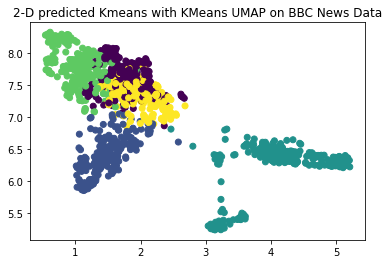

In [ ]:
plt.scatter(embedding_bbc_umap_cs[:,0], embedding_bbc_umap_cs[:,1], c=y_pred_KM_bbc)
plt.title("2-D predicted Kmeans with KMeans UMAP on BBC News Data")